# Logistic Regression on Iris Dataset
**Author:** Khai Ta  
**Date:** September 2024

## Introduction
In this project, I apply logistic regression to the well-known Iris dataset, which contains 150 samples from three species of Iris flowers: Setosa, Versicolor, and Virginica. The goal is to classify the species based on features like petal and sepal lengths and widths. Logistic regression is chosen for its ability to predict probabilities of categorical outcomes, making it ideal for this classification task.

## Table of Contents
1. [Data Preprocessing](#data-preprocessing)
2. [Exploratory Data Analysis](#eda)
3. [Logistic Regression Model](#logistic-regression-model)
4. [Model Evaluation](#model-evaluation)
5. [Conclusion](#conclusion)

## 1. Data Preprocessing <a name="data-preprocessing"></a>
The Iris dataset includes features related to flower dimensions. We will preprocess the data by mapping species names to numeric values and separating the features from the target variable.

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/Dataset/Iris.csv"
iris = pd.read_csv(path)

In [ ]:
flower_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
iris["Species"] = iris["Species"].map(flower_mapping)

In [ ]:
x = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = iris['Species'].values

## 2. Exploratory Data Analysis <a name="eda"></a>
To understand the relationships between features and species, we will visualize the dataset using scatter plots.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
iris["Species"].value_counts()

,count
Species,
0,50
1,50
2,50


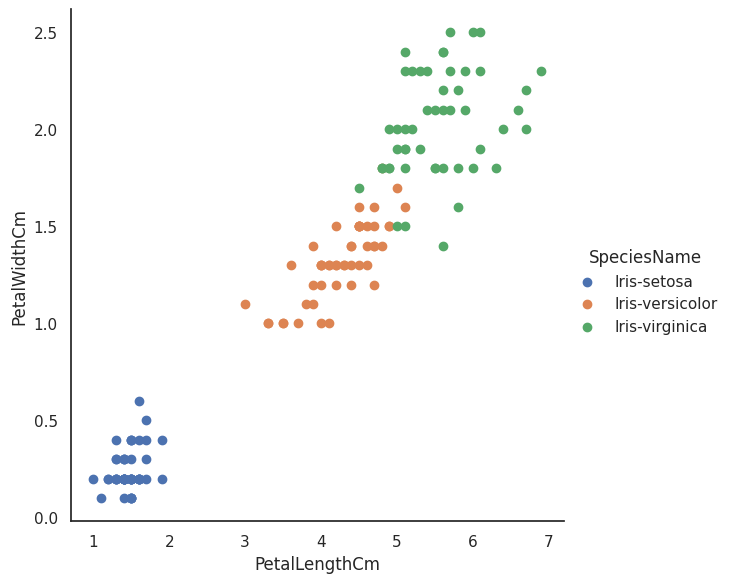

In [ ]:
iris['SpeciesName'] = iris['Species'].map({0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"})
sns.FacetGrid(iris, hue = "SpeciesName", height = 6).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()

## 3. Logistic Regression Model <a name="logistic-regression-model"></a>
We will build the logistic regression model using the features from the dataset to predict the species of Iris flowers.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

In [ ]:
expected = y
predicted = model.predict(x)

## 4. Model Evaluation <a name="model-evaluation"></a>
To evaluate the model's performance, we will calculate its accuracy, generate the classification report, and plot the confusion matrix to visualize how well the model distinguishes between the three Iris species.

In [ ]:
from sklearn import metrics

In [ ]:
model.score(x, y)

0.9733333333333334

In [ ]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [ ]:
print(metrics.confusion_matrix(expected, predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


## 5. Conclusion <a name="conclusion"></a>
We effectively implemented logistic regression to classify Iris flower species, achieving an accuracy of approximately 97%. This demonstrates solid performance for a basic algorithm. Future enhancements could involve exploring more advanced algorithms, such as Random Forest or Support Vector Machines (SVM), as well as tuning hyperparameters to further boost accuracy.